In [1]:
from simulation import *

In [2]:
figureList = list()
# Parameters definition
numRumors = 1
maxThreshold = 1
numMonitors = 10
propagProba = 1
numNodes = 50
linkProba = 0.2
monitorTrigger = list()
numStep = 100



Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)

figureList.append(fig1)

Generating mGraph
----- DONE
Getting layout
----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [44, 48, 19, 46, 33, 34, 42, 35, 20, 46] 
Slist :  [36]


Starting infection







Node  19 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  20 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  33 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  34 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  35 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  42 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  44 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  46 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  48 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
[(34, 1, 1), (35, 1, 1)]

Monitoring Nodes :
Monitoring node number :  34 
	infected by rumor :  1 	at step :  1
Monitoring node number :  35 
	infected by rumor :  1 	at step :  1







Node  19 	 {'infected1': False

/Users/robin/Library/Python/3.6/lib/python/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "









Node  19 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  20 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  33 	 {'infected1': True, 'counter1': [34, 35], 'threshold': 1, 'detected1': True}
Node  34 	 {'infected1': True, 'counter1': [36], 'threshold': 1, 'detected1': True}
Node  35 	 {'infected1': True, 'counter1': [36, 37], 'threshold': 1, 'detected1': True}
Node  42 	 {'infected1': True, 'counter1': [37], 'threshold': 1, 'detected1': True}
Node  44 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  46 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  48 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
[(19, 1, 3), (20, 1, 3), (33, 1, 2), (34, 1, 1), (35, 1, 1), (42, 1, 2), (44, 1, 3)]

Monitoring Nodes :
Monitoring node number :  19 
	infected by rumor :  1 	at step :  3
Monitoring node number :  20 
	infected by rumor :  1 	a








Node  19 	 {'infected1': True, 'counter1': [18], 'threshold': 1, 'detected1': True}
Node  20 	 {'infected1': True, 'counter1': [18], 'threshold': 1, 'detected1': True}
Node  33 	 {'infected1': True, 'counter1': [32, 34, 35], 'threshold': 1, 'detected1': True}
Node  34 	 {'infected1': True, 'counter1': [32, 33, 11, 36], 'threshold': 1, 'detected1': True}
Node  35 	 {'infected1': True, 'counter1': [33, 2, 36, 37], 'threshold': 1, 'detected1': True}
Node  42 	 {'infected1': True, 'counter1': [40, 37], 'threshold': 1, 'detected1': True}
Node  44 	 {'infected1': True, 'counter1': [42], 'threshold': 1, 'detected1': True}
Node  46 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
Node  48 	 {'infected1': False, 'counter1': [], 'threshold': 1, 'detected1': False}
[(19, 1, 3), (20, 1, 3), (33, 1, 2), (34, 1, 1), (35, 1, 1), (42, 1, 2), (44, 1, 3), (46, 1, 4)]

Monitoring Nodes :
Monitoring node number :  19 
	infected by rumor :  1 	at step :  3
Monitoring node n

 1
Monitoring node number :  42 
	infected by rumor :  1 	at step :  2
Monitoring node number :  44 
	infected by rumor :  1 	at step :  3
Monitoring node number :  46 
	infected by rumor :  1 	at step :  4
Monitoring node number :  48 
	infected by rumor :  1 	at step :  5


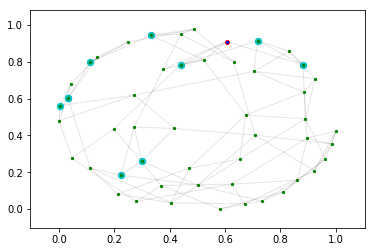

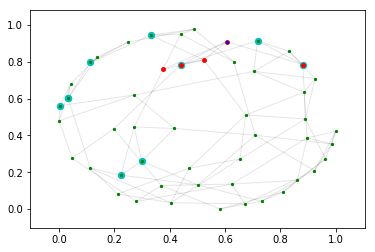

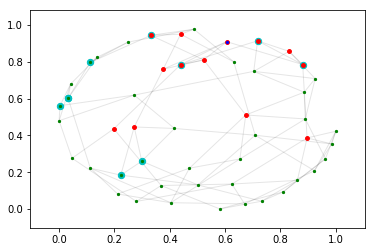

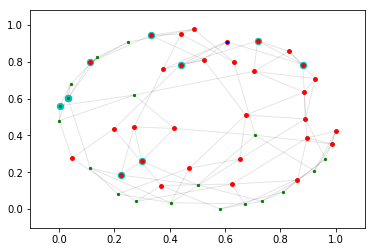

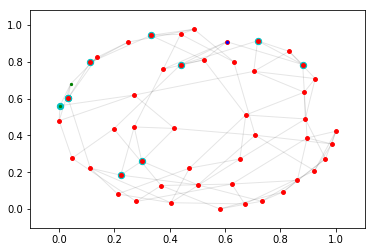

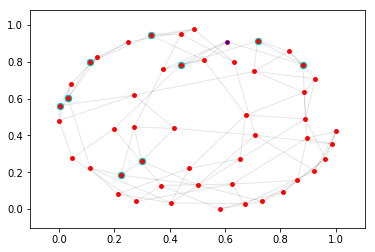

In [3]:
print("Starting infection")
infections = [[] for n in range(numRumors)]



for j in range(5):
    print("====================================================\n\n\n\n\n\n\n\n====================================================")

    for i in Graph.nodes():
        if i in monitorsList:
            print("Node ",str(i),"\t",Graph.node[i])

    Graph = infectionForward(Graph, propagProba, numRumors)
    
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)

    print(monitorTrigger)
    printMonitorTrig(monitorTrigger)

    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
    fig2.show()
plt.show()

In [9]:
def findSet(myG,mySourceNode,myRadius):
    possible_set = list()
    curSet = findNeighDegN(myG,mySourceNode,myRadius)

    return  curSet

sets = list()
for i in range(len(monitorTrigger)):
    set1 =findSet(Graph,monitorTrigger[i][0],monitorTrigger[i][2])
    sets.append(set(set1))
    
print(set.intersection(*sets))

{36}


In [43]:
monitorTrigger

[(2, 1, 3),
 (10, 1, 1),
 (11, 1, 1),
 (17, 1, 3),
 (18, 1, 3),
 (30, 1, 5),
 (34, 1, 4),
 (39, 1, 3),
 (43, 1, 5),
 (48, 1, 3)]

In [7]:
rumorSources

[36]